# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | cairns city
City not found. Skipping...
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | chelno-vershiny
Processing Record 6 of Set 1 | daru
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | sisimiut
Processing Record 9 of Set 1 | nangong
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | minas de marcona
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | karratha
Processing Record 20 of Set 1 | encruzilhada do sul
Processing Record 21 of Set 1 | walvis bay
Processing Re

Processing Record 37 of Set 4 | howrah
Processing Record 38 of Set 4 | santa cruz del sur
Processing Record 39 of Set 4 | maralal
Processing Record 40 of Set 4 | ribeira grande
Processing Record 41 of Set 4 | rajgarh
Processing Record 42 of Set 4 | rahuri
Processing Record 43 of Set 4 | severo-yeniseyskiy
Processing Record 44 of Set 4 | igrim
Processing Record 45 of Set 4 | sinop
Processing Record 46 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 47 of Set 4 | kununurra
Processing Record 48 of Set 4 | nuuk
Processing Record 49 of Set 4 | raduzhny
Processing Record 0 of Set 5 | qalat
Processing Record 1 of Set 5 | poso
Processing Record 2 of Set 5 | college
Processing Record 3 of Set 5 | al kharijah
Processing Record 4 of Set 5 | wundanyi
Processing Record 5 of Set 5 | kaoma
Processing Record 6 of Set 5 | mazamari
Processing Record 7 of Set 5 | kashgar
Processing Record 8 of Set 5 | trail
Processing Record 9 of Set 5 | yatou
Processing Record 10 of Set 5 | hithadhoo
Pr

Processing Record 29 of Set 8 | mont-tremblant
Processing Record 30 of Set 8 | cestos city
Processing Record 31 of Set 8 | antsiranana
Processing Record 32 of Set 8 | nizhniy kuranakh
Processing Record 33 of Set 8 | kargopol'
Processing Record 34 of Set 8 | richards bay
Processing Record 35 of Set 8 | primero de mayo
Processing Record 36 of Set 8 | noumea
Processing Record 37 of Set 8 | ishigaki
Processing Record 38 of Set 8 | sidney
Processing Record 39 of Set 8 | lata
Processing Record 40 of Set 8 | inyonga
Processing Record 41 of Set 8 | pallasovka
Processing Record 42 of Set 8 | bayanhongor
Processing Record 43 of Set 8 | shahritus
Processing Record 44 of Set 8 | manay
Processing Record 45 of Set 8 | kingscliff
Processing Record 46 of Set 8 | weno
Processing Record 47 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 48 of Set 8 | dazhou
Processing Record 49 of Set 8 | thunder bay
Processing Record 0 of Set 9 | lobujya
Processing Record 1 of Set 9 | port hed

Processing Record 19 of Set 12 | chernyshevsk
Processing Record 20 of Set 12 | callao
Processing Record 21 of Set 12 | yangor
City not found. Skipping...
Processing Record 22 of Set 12 | kavalerovo
Processing Record 23 of Set 12 | la gloria
Processing Record 24 of Set 12 | valparaiso
Processing Record 25 of Set 12 | tsiombe
Processing Record 26 of Set 12 | ciudad acuna
Processing Record 27 of Set 12 | duyun
Processing Record 28 of Set 12 | senador jose porfirio
Processing Record 29 of Set 12 | balqash
Processing Record 30 of Set 12 | bargara
City not found. Skipping...
Processing Record 31 of Set 12 | holualoa
Processing Record 32 of Set 12 | faraskur
Processing Record 33 of Set 12 | tunceli
Processing Record 34 of Set 12 | pyapon
Processing Record 35 of Set 12 | leh
Processing Record 36 of Set 12 | olyokminsk
Processing Record 37 of Set 12 | fisterra
Processing Record 38 of Set 12 | kangding
Processing Record 39 of Set 12 | taltal
Processing Record 40 of Set 12 | grand-lahou
Processin

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,15.09,94,100,1.03,CA,1695176179
1,grytviken,-54.2811,-36.5092,-8.49,82,14,4.33,GS,1695176257
2,talnakh,69.4865,88.3972,4.56,96,100,8.81,RU,1695176257
3,chelno-vershiny,54.4333,51.1000,7.02,59,15,0.53,RU,1695176257
4,daru,-9.0763,143.2092,26.58,81,80,5.95,PG,1695176257


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,15.09,94,100,1.03,CA,1695176179
1,grytviken,-54.2811,-36.5092,-8.49,82,14,4.33,GS,1695176257
2,talnakh,69.4865,88.3972,4.56,96,100,8.81,RU,1695176257
3,chelno-vershiny,54.4333,51.1000,7.02,59,15,0.53,RU,1695176257
4,daru,-9.0763,143.2092,26.58,81,80,5.95,PG,1695176257


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

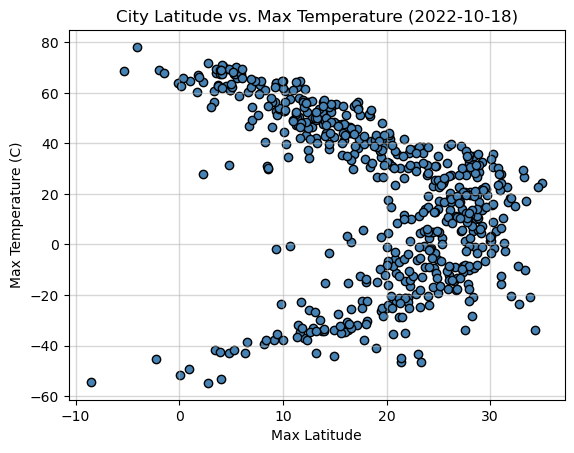

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"], city_data_df["Lat"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Max Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

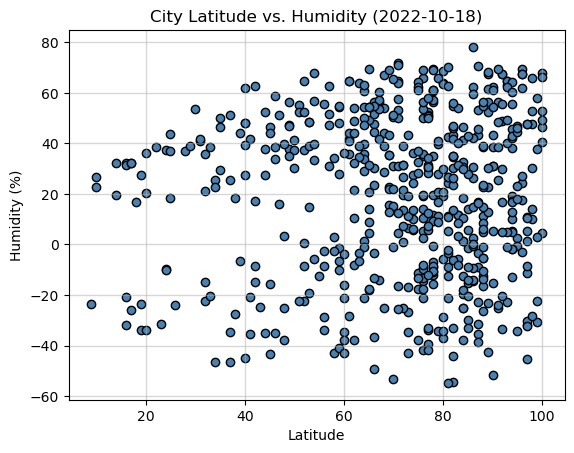

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Humidity"], city_data_df["Lat"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

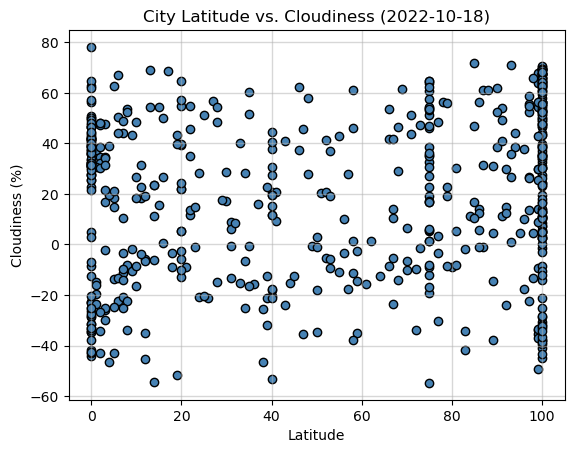

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Cloudiness"], city_data_df["Lat"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

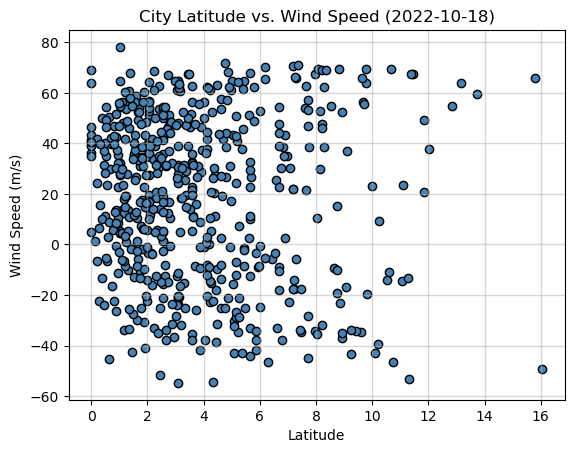

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Wind Speed"], city_data_df["Lat"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {round(r[0],2)}") 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    sh_line_eqn = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(sh_line_eqn, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,15.09,94,100,1.03,CA,1695176179
2,talnakh,69.4865,88.3972,4.56,96,100,8.81,RU,1695176257
3,chelno-vershiny,54.4333,51.1000,7.02,59,15,0.53,RU,1695176257
6,sisimiut,66.9395,-53.6735,1.84,68,6,2.74,GL,1695176258
7,nangong,37.3581,115.3744,22.54,52,46,3.94,CN,1695176258


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-8.49,82,14,4.33,GS,1695176257
4,daru,-9.0763,143.2092,26.58,81,80,5.95,PG,1695176257
5,west island,-12.1568,96.8225,25.99,78,75,5.14,CC,1695176258
8,port elizabeth,-33.9180,25.5701,16.29,77,72,2.68,ZA,1695175960
9,minas de marcona,-15.2119,-75.1103,14.05,85,33,4.26,PE,1695176258


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.83


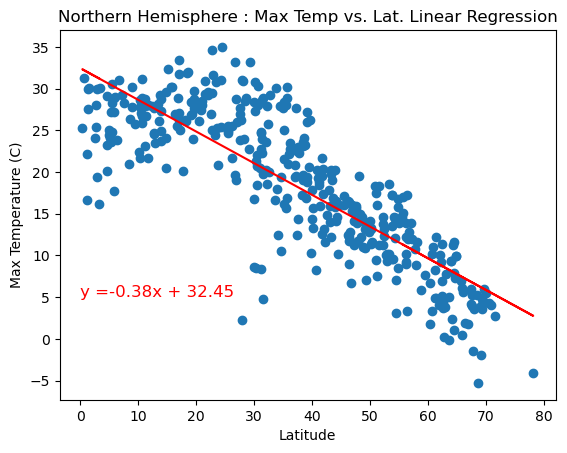

In [49]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0,5))

# Incorporate the other graph properties
plt.title("Northern Hemisphere : Max Temp vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("output_data/North_Hemi - Temp vs. LatLinear Regression.png")

The r-value is: 0.67


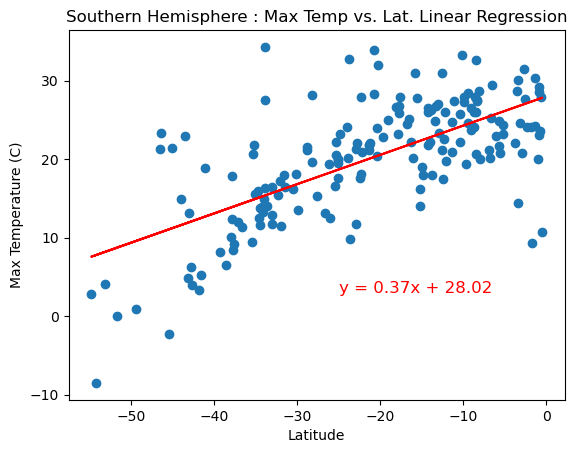

In [48]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-25, 3))

# Incorporate the other graph properties
plt.title("Southern Hemisphere : Max Temp vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.savefig("output_data/South_Hemi - Temp vs. LatLinear Regression.png")

**Discussion about the linear relationship:** 
There is a reasonably strong negative correlation between max temperature and latitude on the Northern Hemisphere with a correlation coefficient of roughly -0.83

There is a decently strong positive correlation between max temperature and latitude on the Southern Hemisphere with a correlation coefficient of roughly 0.67

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.02


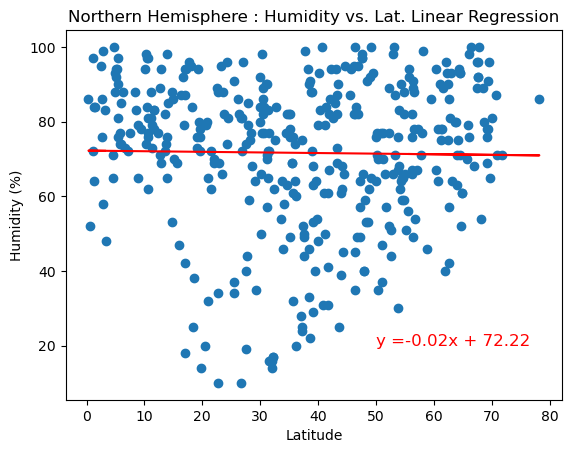

In [53]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (50, 20))

# Incorporate the other graph properties
plt.title("Northern Hemisphere : Humidity vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/North_Hemi - Hum vs. LatLinear Regression.png")

The r-value is: 0.14


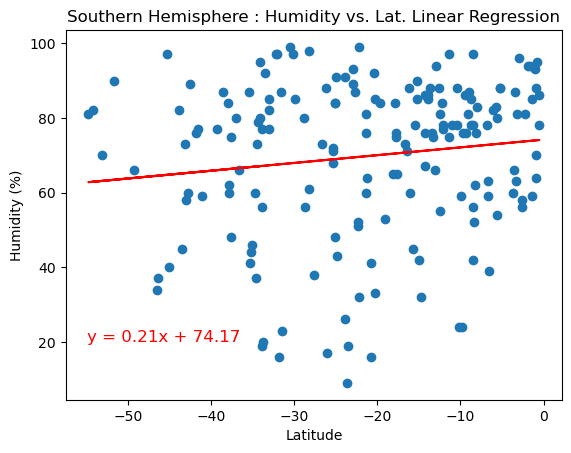

In [59]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-55, 20))

# Incorporate the other graph properties
plt.title("Southern Hemisphere : Humidity vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/South_Hemi - Hum vs. LatLinear Regression.png")

**Discussion about the linear relationship:**
There is a noticeably weak negative correlation between humidity and latitude on the Northern Hemisphere with a correlation coefficient of roughly -0.02

There is a very slight positive correlation between humidity and latitude on the Southern Hemisphere with a correlation coefficient of roughly 0.14

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07


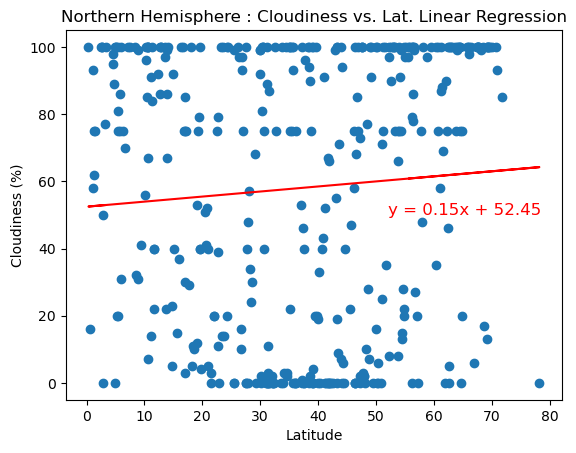

In [62]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (52, 50))

# Incorporate the other graph properties
plt.title("Northern Hemisphere : Cloudiness vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/North_Hemi - Cloud vs. LatLinear Regression.png")

The r-value is: -0.01


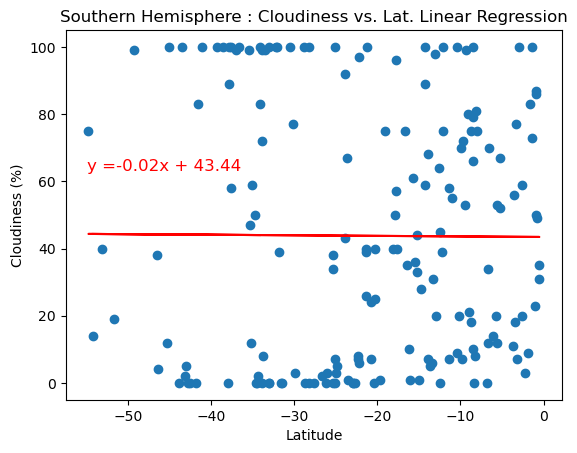

In [65]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-55, 63))

# Incorporate the other graph properties
plt.title("Southern Hemisphere : Cloudiness vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/South_Hemi - Cloud vs. LatLinear Regression.png")

**Discussion about the linear relationship:** 
There is an extremely slight positive correlation between cloudiness and latitude on the Northern Hemisphere with a correlation coefficient of roughly 0.07

There is a noticeably weak negative correlation between cloudiness and latitude on the Southern Hemisphere with a correlation coefficient of roughly -0.01

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.26


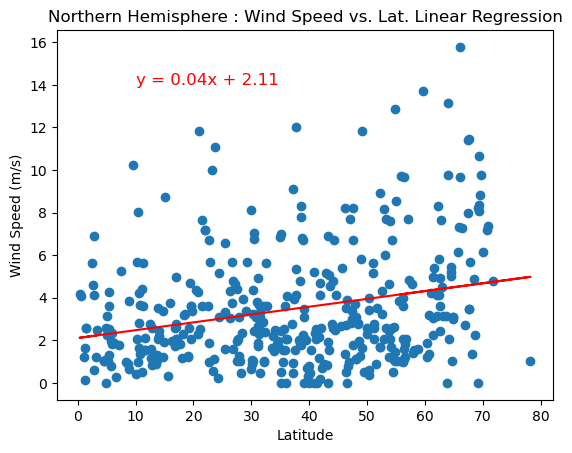

In [69]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10, 14))

# Incorporate the other graph properties
plt.title("Northern Hemisphere : Wind Speed vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("output_data/North_Hemi - WindSpeed vs. LatLinear Regression.png")

The r-value is: -0.28


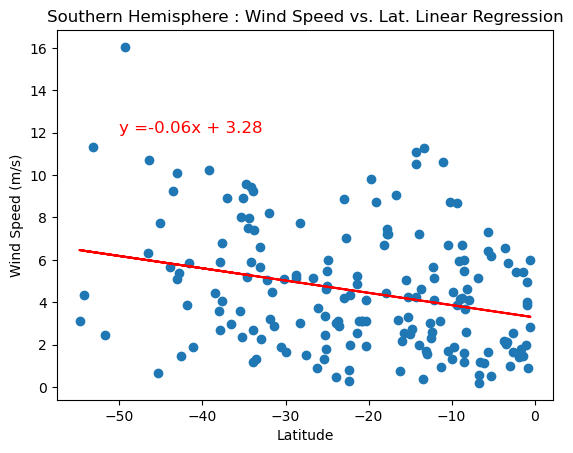

In [71]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-50, 12))

# Incorporate the other graph properties
plt.title("Southern Hemisphere : Wind Speed vs. Lat. Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig("output_data/South_Hemi - WindSpeed vs. LatLinear Regression.png")

**Discussion about the linear relationship:** 
There is a very slight positive correlation between wind speed and latitude on the Northern Hemisphere with a correlation coefficient of roughly 0.26

There is a slight negative correlation between wind speed and latitude on the Southern Hemisphere with a correlation coefficient of roughly -0.28